# Post Process model generation
---

[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.7690407.svg)](https://doi.org/10.5281/zenodo.7690407)


In [1]:
import pandas as pd
import numpy as np

import pylab as plt
plt.style.use('ggplot')

<AxesSubplot:xlabel='L', ylabel='acc'>

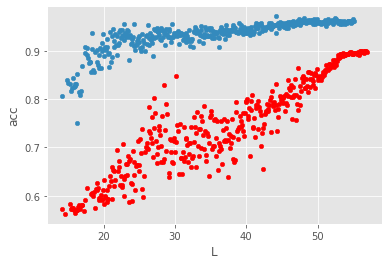

In [2]:
df=pd.concat([pd.read_csv('RESDSM_125310.csv'),pd.read_csv('RESDSM_16131015.csv')])
df=df.dropna()
df['L'] = [np.round(x,1) for x in df.nq_mean.values]
dfm=df.groupby(['L']).mean().reset_index()
dfs=df.groupby(['L']).std().reset_index()
ax=dfm.plot.scatter(x='L',y='acc')
#dfs

df1=pd.concat([pd.read_csv('RESphase1_125310.csv'),pd.read_csv('RESphase1_16131015.csv')])
df1=df1.dropna()
df1['L'] = [np.round(x,1) for x in df1.nq_mean.values]
df1m=df1.groupby(['L']).mean().reset_index()
df1s=df1.groupby(['L']).std().reset_index()
df1m.plot.scatter(x='L',y='acc',ax=ax,color='r')
#dfs

In [3]:
df[df.L.between(18,20)].sort_values('acc').tail()#[(df.nest==2) & (df.maxdepth==10)]

,c1,c2,acc,s1,s2,nq_mean,nq_std,maxdepth,nest,run,L
2,0.95,0.99,0.939309,0.990625,0.797816,19.906780,3.677663,7,3,0,19.9
322,0.99,0.99,0.941686,0.942143,0.765000,19.508475,3.404249,7,3,5,19.5
899,0.95,0.99,0.943952,0.987500,0.837569,19.677966,3.619349,8,3,14,19.7
1795,0.99,0.99,0.953197,0.937944,0.843227,19.677966,3.096968,8,3,28,19.7
1027,0.99,0.99,0.963369,0.914489,0.947368,18.957627,3.065373,8,3,16,19.0


In [4]:
df1[df1.L.between(19,21)].sort_values('acc').tail()#[(df.nest==2) & (df.maxdepth==10)]

,c1,c2,acc,s1,s2,nq_mean,nq_std,maxdepth,nest,run,L
450,0.89,0.89,0.630333,0.495678,0.432185,21.046243,1.777016,7,3,7,21.0
1793,0.89,0.89,0.632431,0.434310,0.503362,19.371227,1.621435,6,3,28,19.4
130,0.84,0.85,0.640882,0.579825,0.550055,20.937701,2.054329,7,3,2,20.9
386,0.89,0.84,0.647715,0.475581,0.607005,20.779062,2.376020,7,3,6,20.8
1090,0.90,0.89,0.656619,0.506513,0.500722,19.993577,2.108785,7,3,17,20.0


In [5]:
dfs=df.groupby('L').std().ewm(alpha=.01).mean().sort_index()
df1s=df1.groupby('L').std().ewm(alpha=.01).mean().sort_index()
dfs

dfs=df.groupby('L').std().sort_index()*(2.6/np.sqrt(100))
df1s=df1.groupby('L').std().sort_index()*(2.6/np.sqrt(150))



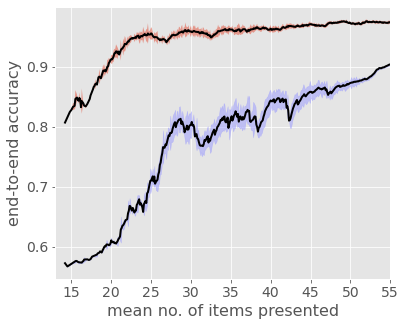

In [6]:
fig=plt.figure(figsize=[6,5])
epx=.0
LW=2
dfm=df.groupby('L').max().sort_index().acc.ewm(alpha=.1).mean()
df1m=df1.groupby('L').max().sort_index().acc.ewm(alpha=.1).mean()
plt.fill_between(dfm.index.values,dfm+dfs.fillna(0).acc+epx,dfm-dfs.fillna(0).acc-epx,alpha=.5)
#epx=.0
plt.fill_between(df1m.index.values,df1m+df1s.fillna(0).acc+epx,df1m-df1s.fillna(0).acc-epx,alpha=.5,color='#9999ff')
dfm.plot(color='k',lw=LW)
df1m.plot(color='k',lw=LW)
#plt.gca().set_ylim(None,1)
plt.gca().set_xlim(13,55)
ax=plt.gca()
FS=16
FS2=14
ax.set_xlabel('mean no. of items presented',fontsize=FS)
ax.set_ylabel('end-to-end accuracy',fontsize=FS)
plt.xticks(fontsize=FS2, rotation=0);
plt.yticks(fontsize=FS2, rotation=0);
#ax.legend(['Biotype'],fontsize=FS,bbox_to_anchor=(.85, .35),ncol=1)
plt.savefig('Lvsacc_onlybiotype.png',dpi=300,bbox_inches='tight',transparent=True)
#ax=df.groupby('L').max().sort_index().acc.ewm(alpha=.2).mean().plot()
#df1.groupby('L').max().sort_index().acc.ewm(alpha=.8).mean().plot(ax=ax)
pd.DataFrame(df1m).join(pd.DataFrame(df1s.fillna(0).acc+0.0001*np.random.rand()),rsuffix='_std').to_excel('itemsVsacc.xlsx')

In [7]:
import tarfile
import os
from pathlib import Path
Path("modeldir").mkdir(parents=True, exist_ok=True)

t = tarfile.open('P1models.tgz', 'r')
for member in t.getmembers():
    if "P1_12" in member.name:
        t.extract(member, "modeldir")
for member in t.getmembers():
    if "P1_10" in member.name:
        t.extract(member, "modeldir")
for member in t.getmembers():
    if "P1_7" in member.name:
        t.extract(member, "modeldir")

t1 = tarfile.open('DSMmodels.tgz', 'r')
for member in t1.getmembers():
    if "DSM_12" in member.name:
        t1.extract(member, "modeldir")
for member in t1.getmembers():
    if "DSM_10" in member.name:
        t1.extract(member, "modeldir")
for member in t1.getmembers():
    if "DSM_7" in member.name:
        t1.extract(member, "modeldir")


In [8]:
# get importance bounds
modelname='modeldir/P1models/P1_12_10_29.mod'
# load model
import dill
with open(modelname,'rb') as f:
    M=dill.load(f)
    
def getCF(Rs,LABELS=['B1','B2','B3']):  
    CF=np.zeros([3,3])
    s2=Rs.s1
    s3=Rs.s2
    c2=Rs.c1
    c3=Rs.c2
    CF=[[c2*c3,1-c2,c2*(1-c3)],[(1-s2)*(1-s3),s2,(1-s2)*s3],[c2*(1-s3),1-c2,c2*s3]]

    CF=pd.DataFrame(CF,columns=LABELS)
    CF.index=CF.columns
    return CF

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [9]:
df1_=df1[(df1.nest>=10) & (df1.maxdepth>=12)]
S=pd.DataFrame()
count=0
for i in df1_.iterrows():
    count=count+1
    cf=getCF(i[1])
    cfvar=getCF(i[1])**2
    if S.empty:
        S=cf
        V=cfvar
    else:
        S=S+cf
        V=V+cfvar
S=S/count
V=V/count
Sbnd=np.sqrt(V-S**2)*(count/(count-1))
S=S.round(3)
Sbnd=Sbnd.round(3)
S_=S.astype(str)+' ('+(S-Sbnd).round(3).astype(str)+', '+(S+Sbnd).round(3).astype(str)+')'
S_.to_csv('confusion_phase1.csv')
S_

,B1,B2,B3
B1,"0.918 (0.896, 0.94)","0.04 (0.023, 0.057)","0.041 (0.026, 0.056)"
B2,"0.02 (0.014, 0.026)","0.853 (0.815, 0.891)","0.127 (0.092, 0.162)"
B3,"0.134 (0.101, 0.167)","0.04 (0.023, 0.057)","0.826 (0.787, 0.865)"


In [10]:
df_=df[(df.nest>=10) & (df.maxdepth>=12)]
S=pd.DataFrame()
count=0
for i in df_.iterrows():
    count=count+1
    cf=getCF(i[1],LABELS=['D1','D2',"D5"])
    cfvar=getCF(i[1],LABELS=['D1','D2',"D5"])**2
    if S.empty:
        S=cf
        V=cfvar
    else:
        S=S+cf
        V=V+cfvar
S=S/count
V=V/count
Sbnd=np.sqrt(V-S**2)*(count/(count-1))
S=S.round(3)
Sbnd=Sbnd.round(3)
S_=S.astype(str)+' ('+(S-Sbnd).round(3).astype(str)+', '+(S+Sbnd).round(3).astype(str)+')'
S_.to_csv('confusion_dsm.csv')
S_

,D1,D2,D5
D1,"0.974 (0.961, 0.987)","0.016 (0.003, 0.029)","0.01 (0.008, 0.012)"
D2,"0.005 (0.001, 0.009)","0.942 (0.909, 0.975)","0.052 (0.022, 0.082)"
D5,"0.093 (0.062, 0.124)","0.016 (0.003, 0.029)","0.891 (0.856, 0.926)"


In [11]:
dataf=pd.read_csv('combined_bsnip.csv',index_col=0).drop('DSM',axis=1)
DELVAR=['project','BACS_COMP_Z']
cols=[x for x in dataf.columns if x not in DELVAR]
feature_names=cols
feature_names=feature_names[1:]

In [12]:
import glob
MODELS=glob.glob('modeldir/P1models/P1_10_*')
I={}
for modelname in MODELS:
    with open(modelname,'rb') as f:
        M=dill.load(f)

    IMP1=M[1]['estimator'].feature_importances_
    IMP2=M[2]['estimator'].feature_importances_
    IMP3=M[3]['estimator'].feature_importances_
    plt.style.use('fivethirtyeight')
    plt.style.use('ggplot')
    IMPdf=pd.DataFrame({'bio3_vs_all':IMP3,'bio2_vs_all':IMP2,'bio1_vs_all':IMP1})
    IMPdf.index=feature_names
    I[modelname]=IMPdf.transpose().reset_index()
I=pd.concat(I.values())    

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

In [13]:
from itertools import cycle, islice
custom_colors = list(islice(cycle(['#AF1D1D','#4575F0','#1AB44A']), None, 3))
plt.style.use('seaborn-whitegrid')

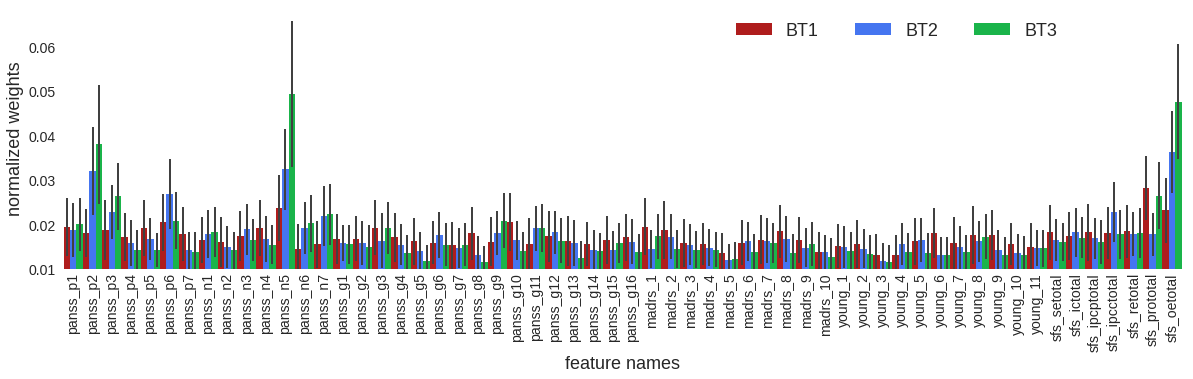

In [14]:
fig=plt.figure(figsize=[18,4.5])
Imean=I.groupby('index').mean()
Isd=I.groupby('index').std()
FS=18
FS2=14
w=0.33
LW=2
COL='.25'
Imean.transpose().plot(kind='bar',ax=plt.gca(),width=1,color=custom_colors)
plt.errorbar(np.arange(len(Imean.columns)), Imean.loc['bio2_vs_all',:].values,
             Isd.loc['bio2_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)
plt.errorbar(np.arange(len(Imean.columns))-w, Imean.loc['bio1_vs_all',:].values,
             Isd.loc['bio1_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)
plt.errorbar(np.arange(len(Imean.columns))+w, Imean.loc['bio3_vs_all',:].values,
             Isd.loc['bio3_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)

plt.gca().set_xticks(np.arange(len(feature_names)))
plt.gca().set_xticklabels(feature_names,rotation=90);
#plt.legend(bbox_to_anchor=(.5, 1), loc='upper left', borderaxespad=0)
plt.gca().legend(['BT1','BT2','BT3'],fontsize=FS,bbox_to_anchor=(.9, 1),ncol=3)
ax=plt.gca()
ax.set_ylim(0.01,None)
ax.set_xlabel('feature names',fontsize=FS)
ax.set_ylabel('normalized weights',fontsize=FS)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(fontsize=FS2, rotation=90);
plt.yticks(fontsize=FS2);

plt.savefig('impPhase1.png',dpi=300,bbox_inches='tight',transparent=True)

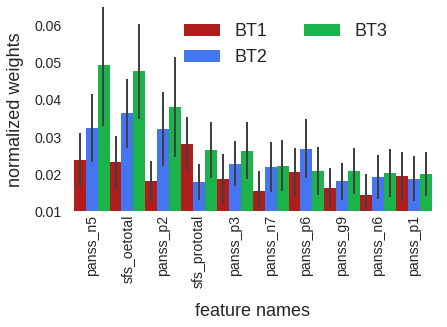

In [15]:
fig=plt.figure(figsize=[6,3.5])
Imean=I.groupby('index').mean()
Isd=I.groupby('index').std()
FS=18
FS2=14
w=0.33
LW=2
COL='.25'

sImean=Imean.sort_values('bio3_vs_all',axis=1,ascending=False).iloc[:,:10]
sIsd=Isd.loc[:,sImean.columns]


sImean.transpose().plot(kind='bar',ax=plt.gca(),width=1,color=custom_colors)
plt.errorbar(np.arange(len(sImean.columns)), sImean.loc['bio2_vs_all',:].values,
             sIsd.loc['bio2_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)
plt.errorbar(np.arange(len(sImean.columns))-w, sImean.loc['bio1_vs_all',:].values,
             sIsd.loc['bio1_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)
plt.errorbar(np.arange(len(sImean.columns))+w, sImean.loc['bio3_vs_all',:].values,
             sIsd.loc['bio3_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)

#plt.gca().set_xticks(np.arange(len(feature_names)))
#plt.gca().set_xticklabels(feature_names,rotation=90);
plt.gca().legend(['BT1','BT2','BT3'],fontsize=FS,bbox_to_anchor=(.9, 1),ncol=2)
ax=plt.gca()
ax.set_ylim(0.01,0.065)
ax.set_xlabel('feature names',fontsize=FS,labelpad=15)
ax.set_ylabel('normalized weights',fontsize=FS,labelpad=10)
plt.xticks(fontsize=FS2, rotation=90);
plt.yticks(fontsize=FS2, rotation=0);
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.savefig('sorted_impPhase1.png',dpi=300,bbox_inches='tight',transparent=True)

In [16]:
Imean.transpose().join(Isd.transpose(),rsuffix='_cnfband').to_excel('feature_impotance_biotype.xlsx')

In [17]:
custom_colors = list(islice(cycle(['.1','.4','.7']), None, 3))

In [18]:
import glob
MODELSdsm=glob.glob('modeldir/DSMmodels/DSM_10_*')
Idsm={}
for modelname in MODELSdsm:
    with open(modelname,'rb') as f:
        M=dill.load(f)

    IMP1=M[1]['estimator'].feature_importances_
    IMP2=M[2]['estimator'].feature_importances_
    IMP5=M[5]['estimator'].feature_importances_
    plt.style.use('fivethirtyeight')
    plt.style.use('ggplot')
    IMPdf=pd.DataFrame({'bio5_vs_all':IMP5,'bio2_vs_all':IMP2,'bio1_vs_all':IMP1})
    IMPdf.index=feature_names
    Idsm[modelname]=IMPdf.transpose().reset_index()
Idsm=pd.concat(Idsm.values())    

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or in

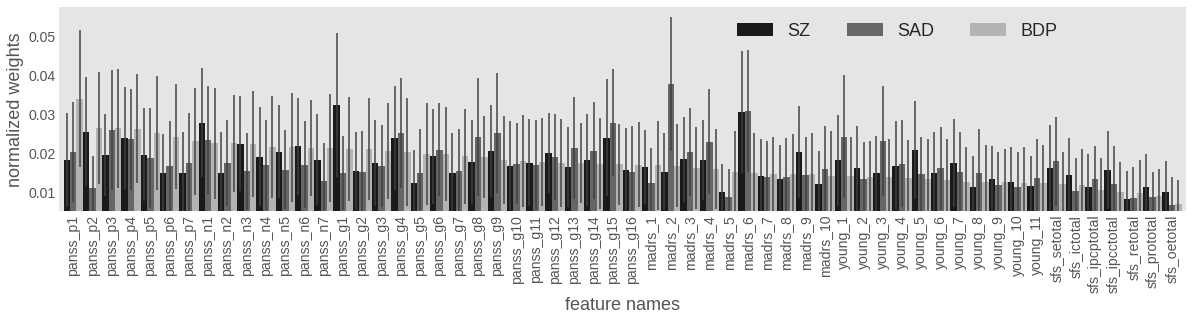

In [19]:
fig=plt.figure(figsize=[18,3.5])
Imeandsm=Idsm.groupby('index').mean()
Isddsm=Idsm.groupby('index').std()

Imeandsm=Imeandsm.transpose().sort_values('bio5_vs_all',ascending=False)
Isddsm=Isddsm.transpose()
Isddsm=Isddsm.loc[Imeandsm.index,:]
Isddsm=Isddsm.transpose()
Imeandsm=Imeandsm.transpose()

FS=18
FS2=14

w=0.33
LW=2
COL='.25'
Imeandsm.transpose().plot(kind='bar',ax=plt.gca(),width=1,color=custom_colors)
plt.errorbar(np.arange(len(Imeandsm.columns)), Imeandsm.loc['bio2_vs_all',:].values,
             Isddsm.loc['bio2_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(Imeandsm.columns))-w, Imeandsm.loc['bio1_vs_all',:].values,
             Isddsm.loc['bio1_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(Imeandsm.columns))+w, Imeandsm.loc['bio5_vs_all',:].values,
             Isddsm.loc['bio5_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)

plt.gca().set_xticks(np.arange(len(feature_names)))
plt.gca().set_xticklabels(feature_names,rotation=90);
plt.gca().legend(['SZ','SAD','BDP'],fontsize=FS,bbox_to_anchor=(.9, 1),ncol=3)
ax=plt.gca()
ax.set_ylim(0.0051,None)
ax.set_xlabel('feature names',fontsize=FS)
ax.set_ylabel('normalized weights',fontsize=FS)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(fontsize=FS2, rotation=90);
plt.yticks(fontsize=FS2);
plt.savefig('impDSM.png',dpi=300,bbox_inches='tight',transparent=True)

In [20]:
sImeandsm=Imeandsm.sort_values('bio5_vs_all',axis=1,ascending=False).iloc[:,:10]
sIsddsm=Isddsm.loc[:,sImeandsm.columns]


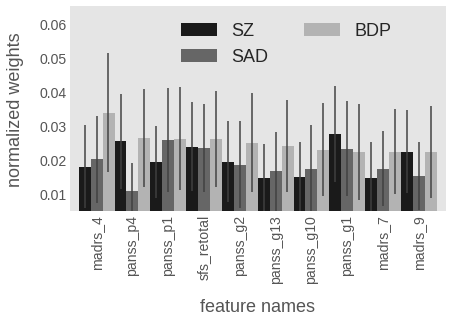

In [21]:
fig=plt.figure(figsize=[6,3.5])
FS=18
FS2=14

w=0.33
LW=2
COL='.25'
sImeandsm.transpose().plot(kind='bar',ax=plt.gca(),width=1,color=custom_colors)
plt.errorbar(np.arange(len(sImeandsm.columns)), sImeandsm.loc['bio2_vs_all',:].values,
             sIsddsm.loc['bio2_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(sImeandsm.columns))-w, sImeandsm.loc['bio1_vs_all',:].values,
             sIsddsm.loc['bio1_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(sImeandsm.columns))+w, sImeandsm.loc['bio5_vs_all',:].values,
             sIsddsm.loc['bio5_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)

#plt.gca().set_xticks(np.arange(len(feature_names)))
#plt.gca().set_xticklabels(feature_names,rotation=90);
plt.gca().legend(['SZ','SAD','BDP'],fontsize=FS,bbox_to_anchor=(.9, 1),ncol=2)
ax=plt.gca()
ax.set_ylim(0.0051,0.065)
ax.set_xlabel('feature names',fontsize=FS,labelpad=15)
ax.set_ylabel('normalized weights',fontsize=FS,labelpad=15)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(fontsize=FS2, rotation=90);
plt.yticks(fontsize=FS2);
plt.savefig('sorted_impDSM.png',dpi=300,bbox_inches='tight',transparent=True)

In [22]:
Imeandsm

,madrs_4,panss_p4,panss_p1,sfs_retotal,panss_g2,panss_g13,panss_g10,panss_g1,madrs_7,madrs_9,...,madrs_2,young_8,madrs_1,panss_g11,young_1,madrs_5,panss_n7,panss_g8,young_9,young_3
index,,,,,,,,,,,,,,,,,,,,,
bio1_vs_all,0.017991,0.025412,0.019325,0.023769,0.019492,0.014647,0.014828,0.027705,0.014656,0.022303,...,0.013348,0.012579,0.011453,0.016088,0.014277,0.011295,0.015466,0.008075,0.011252,0.009982
bio2_vs_all,0.020084,0.010849,0.025824,0.023446,0.018594,0.016626,0.017387,0.023243,0.017398,0.015186,...,0.011661,0.011103,0.013524,0.017741,0.010173,0.013254,0.012022,0.008475,0.008554,0.006627
bio5_vs_all,0.033838,0.026259,0.026187,0.026121,0.024988,0.024053,0.022929,0.022360,0.022360,0.022232,...,0.012369,0.012310,0.012167,0.011837,0.011757,0.010443,0.009835,0.009743,0.008759,0.006876


In [23]:
Imeandsm.transpose().sort_values('bio5_vs_all',ascending=False).to_excel('dsmfeaturessorted.xlsx')
Imean.transpose().sort_values('bio3_vs_all',ascending=False).to_excel('phase1featuressorted.xlsx')

In [24]:

def getAVlen(clf,X,cid=0):
    RES=pd.DataFrame(columns=['Lmean','Lstd','compid'])
    count=0
    threshold={}
    feature={}
    node_indicator={}
    leaf_id={}

    for i in clf.estimators_:
        feature[count]= i.tree_.feature
        node_indicator[count] = i.tree_.decision_path(X)
        count=count+1
    
    #print(count)
    L=[]
    LL=[]
    for sample_id in np.arange(len(X)):
        L=[]
        for i in range(count-1):
            L=L+list(feature[i][node_indicator[i].indices[node_indicator[i].indptr[sample_id] : node_indicator[i].indptr[sample_id + 1]]][1:-1])
        LL=np.append(LL,len(list(set(L))))
    L=list(set(L))
    
    RES['Lmean']=[np.mean(LL)]
    RES['Lstd']=[np.std(LL)]
    RES['compid']=[cid]
    return RES    
    


In [25]:
Ef=pd.read_excel('BIOTYPES_HC_withBiofactors_21_1008.xlsx')
Ef_=Ef[['DSM','DSM String']].dropna()
Ef_.DSM=[int(x) for x in Ef_.DSM.values]
df=pd.read_csv('combined_bsnip.csv',index_col=0).drop('DSM',axis=1)
DELVAR=['project','BACS_COMP_Z']
cols=[x for x in df.columns if x not in DELVAR]
df=df[cols]
Xphase1=df.dropna().iloc[:,1:].values.astype(np.float32)

df=df.join(Ef_).dropna()#[['DSM','Biotype']]
df=df[df['DSM String']!='HC'].drop(['Biotype','DSM String'],axis=1)
Xdsm=df.drop('DSM',axis=1).values.astype(np.float32)

In [26]:
def getModelAvLen(modelfile='modeldir/P1models/P1_10_3_0.mod'):
    import sys
    import warnings

    if not sys.warnoptions:
        warnings.simplefilter("ignore")    
        
    with open(modelfile,'rb') as f:
        M=dill.load(f)
    return pd.concat([getAVlen(M[key]['estimator'],Xphase1,cid=key) for key in M.keys()])

In [27]:
import glob
MODELS=glob.glob('modeldir/P1models/P1_7_3_*.mod')
af=pd.concat([getModelAvLen(model)for model in MODELS])
af

,Lmean,Lstd,compid
0,10.351959,0.948625,1
0,10.579319,1.098096,2
0,11.100835,1.046500,3
0,11.072575,0.821515,1
0,10.474631,0.846713,2
...,...,...,...
0,10.495825,0.903580,2
0,10.372511,1.419640,3
0,10.463070,1.071355,1
0,10.881824,0.931244,2


In [28]:
af[af.compid==1].mean()

Lmean     10.659752
Lstd       0.938916
compid     1.000000
dtype: float64

In [29]:
af[af.compid==2].mean()

Lmean     10.483216
Lstd       0.969531
compid     2.000000
dtype: float64

In [30]:
af[af.compid==3].mean()

Lmean     10.510191
Lstd       1.047905
compid     3.000000
dtype: float64

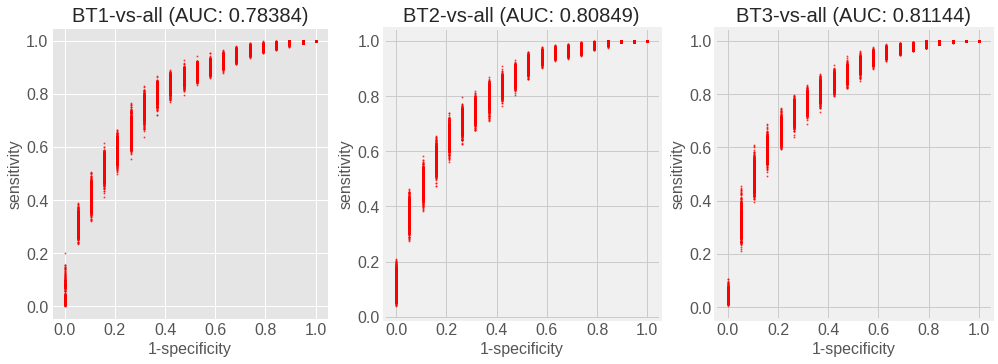

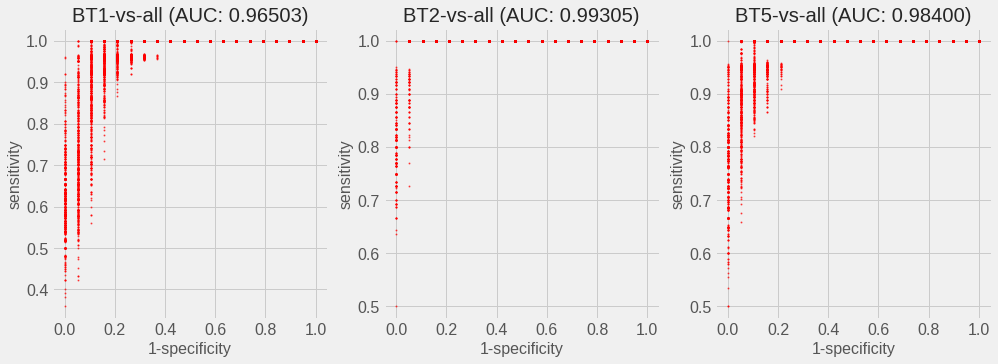

In [31]:
def pltROC(M,VAR,ax,FS=14):
    plt.style.use('fivethirtyeight')
    ROC=M[VAR]['rocs']   
    auc=[]
    for key,crv in ROC.items():
        ax.plot(crv['fpr'],crv['tpr'],'.',ms=2,color='r',alpha=.6)
        auc=np.append(auc,key)
    ax.set_xlabel('1-specificity',fontsize=FS)
    ax.set_ylabel('sensitivity',fontsize=FS)
    plt.setp(ax.get_xticklabels(), fontsize=FS);
    plt.setp(ax.get_yticklabels(), fontsize=FS);
    ax.set_title('BT'+str(VAR)+'-vs-all (AUC: '+ str(auc.mean())[:7]+')' );
   
modelfile='modeldir/P1models/P1_7_3_0.mod'
with open(modelfile,'rb') as f:
    M=dill.load(f)
    

#plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
pltROC(M,1,plt.gca(),FS=16)

plt.subplot(1,3,2)
pltROC(M,2,plt.gca(),FS=16)

plt.subplot(1,3,3)
pltROC(M,3,plt.gca(),FS=16)
plt.savefig('ROCvall_clinical_phase1.png',dpi=400,bbox_inches='tight',transparent=True)



modelfile='modeldir/DSMmodels/DSM_7_3_0.mod'
with open(modelfile,'rb') as f:
    M=dill.load(f)

#plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
pltROC(M,1,plt.gca(),FS=16)

plt.subplot(1,3,2)
pltROC(M,2,plt.gca(),FS=16)

plt.subplot(1,3,3)
pltROC(M,5,plt.gca(),FS=16)
plt.savefig('ROCvall_clinical_DSM.png',dpi=400,bbox_inches='tight',transparent=True)



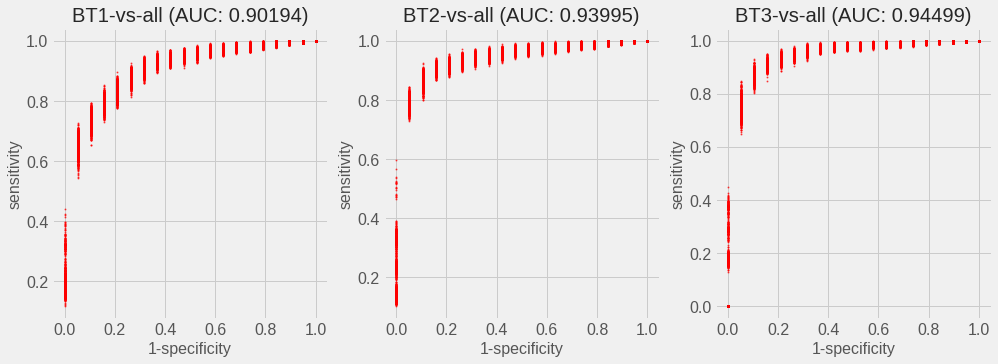

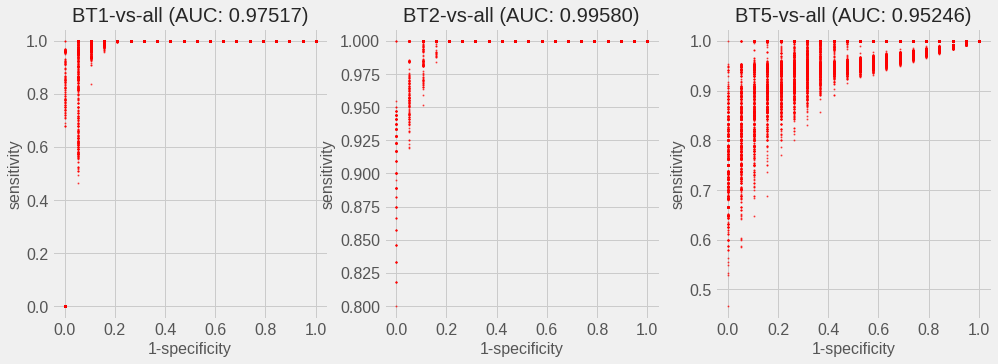

In [32]:
def pltROC(M,VAR,ax,FS=14):
    plt.style.use('fivethirtyeight')
    ROC=M[VAR]['rocs']   
    auc=[]
    for key,crv in ROC.items():
        ax.plot(crv['fpr'],crv['tpr'],'.',ms=2,color='r',alpha=.6)
        auc=np.append(auc,key)
    ax.set_xlabel('1-specificity',fontsize=FS)
    ax.set_ylabel('sensitivity',fontsize=FS)
    plt.setp(ax.get_xticklabels(), fontsize=FS);
    plt.setp(ax.get_yticklabels(), fontsize=FS);
    ax.set_title('BT'+str(VAR)+'-vs-all (AUC: '+ str(auc.mean())[:7]+')' );
   
modelfile='modeldir/P1models/P1_12_3_0.mod'
with open(modelfile,'rb') as f:
    M=dill.load(f)
    

#plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
pltROC(M,1,plt.gca(),FS=16)

plt.subplot(1,3,2)
pltROC(M,2,plt.gca(),FS=16)

plt.subplot(1,3,3)
pltROC(M,3,plt.gca(),FS=16)
plt.savefig('ROCvall_clinical_phase1_28.png',dpi=400,bbox_inches='tight',transparent=True)



modelfile='modeldir/DSMmodels/DSM_12_3_0.mod'
with open(modelfile,'rb') as f:
    M=dill.load(f)

#plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
pltROC(M,1,plt.gca(),FS=16)

plt.subplot(1,3,2)
pltROC(M,2,plt.gca(),FS=16)

plt.subplot(1,3,3)
pltROC(M,5,plt.gca(),FS=16)
plt.savefig('ROCvall_clinical_DSM_28.png',dpi=400,bbox_inches='tight',transparent=True)



In [33]:
import shutil
shutil.rmtree('modeldir')